# Construct confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above.<br>

Strategy division of Ripple Renewable Energy (RRE) operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`. Here I will construct an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Following will be focused:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports


In [1]:
# Import relevant packages.

import pandas as pd
import numpy as np

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time. Use `pandas` to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`.

**Note:** For the purposes of analysis, it is assumed that this data is randomly sampled from a larger population.

In [2]:
# Use read_csv() to import the data.

aqi = pd.read_csv('C:/Users/Sajindra/Downloads/c4_epa_air_quality.csv')

## Step 2: Data exploration

In [3]:
# check the first 5 rows of data
aqi.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


In [4]:
# check datatypes
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        260 non-null    int64  
 1   date_local        260 non-null    object 
 2   state_name        260 non-null    object 
 3   county_name       260 non-null    object 
 4   city_name         260 non-null    object 
 5   local_site_name   257 non-null    object 
 6   parameter_name    260 non-null    object 
 7   units_of_measure  260 non-null    object 
 8   arithmetic_mean   260 non-null    float64
 9   aqi               260 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 20.4+ KB


In [5]:
# check date values
aqi['date_local'].value_counts()


date_local
2018-01-01    260
Name: count, dtype: int64

Note: All of the sites collected data on January 1st, 2018.

In [6]:
# check descriptive statistics

print("Use describe() to summarize AQI")
print(aqi.describe(include='all'))

Use describe() to summarize AQI
        Unnamed: 0  date_local  state_name  county_name      city_name  \
count   260.000000         260         260          260            260   
unique         NaN           1          52          149            190   
top            NaN  2018-01-01  California  Los Angeles  Not in a city   
freq           NaN         260          66           14             21   
mean    129.500000         NaN         NaN          NaN            NaN   
std      75.199734         NaN         NaN          NaN            NaN   
min       0.000000         NaN         NaN          NaN            NaN   
25%      64.750000         NaN         NaN          NaN            NaN   
50%     129.500000         NaN         NaN          NaN            NaN   
75%     194.250000         NaN         NaN          NaN            NaN   
max     259.000000         NaN         NaN          NaN            NaN   

       local_site_name   parameter_name   units_of_measure  arithmetic_mean  \


Note: The minimum AQI value is 0 and the maximum AQI value is 50.

In [7]:
# check value counts of each state 
print("For a more thorough examination of observations by state use values_counts()")
print(aqi['state_name'].value_counts())

# check unique counts of states 
aqi['state_name'].nunique()

For a more thorough examination of observations by state use values_counts()
state_name
California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
New York                10
Pennsylvania            10
Michigan                 9
Colorado                 9
Minnesota                7
New Jersey               6
Indiana                  5
North Carolina           4
Massachusetts            4
Maryland                 4
Oklahoma                 4
Virginia                 4
Nevada                   4
Connecticut              4
Kentucky                 3
Missouri                 3
Wyoming                  3
Iowa                     3
Hawaii                   3
Utah                     3
Vermont                  3
Illinois                 3
New Hampshire            2
District Of Columbia     2
New Mexico               2
Montana                  2
Oregon                   2
Alaska                   2
Georgia              

52

Note: There are 52 unique states. All states are not equally represented. California has 66 sites that reported AQI for this dataset, while states such as Delaware and Alabama have only one site that reported AQI.

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Summarize the mean AQI for the states in which RRE operates.

In [8]:
# Summarize the mean AQI for RRE states.

# Create a list of RRE states.
rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']

# Subset `aqi` to only consider these states using a mask.
aqi_rre = aqi[aqi['state_name'].isin(rre_states)]

# Find the mean aqi and count for each of the RRE states.
aqi_rre.groupby(['state_name']).agg({"aqi":"mean","state_name":"count"}) #alias as aqi_rre

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

In [9]:
# Import seaborn as sns.

import seaborn as sns

### Create an in-line visualization showing the distribution of `aqi` by `state_name`

Now, create an in-line visualization showing the distribution of `aqi` by `state_name`.

<Axes: xlabel='state_name', ylabel='aqi'>

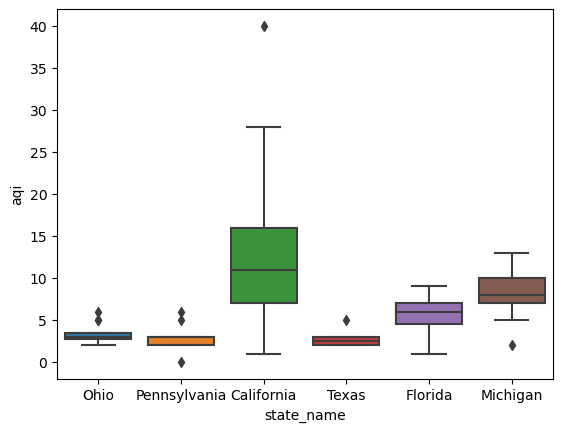

In [10]:
### create box plots for each state
sns.boxplot(x=aqi_rre["state_name"],y=aqi_rre["aqi"])

Based on the visualizations, below states are most affected by this policy:

- California: The mean and a signficant portion of the boxplot range over 10.
- Michigan: While the mean is below 10, the boxplot ranges above 10.

### Construct a confidence interval for the RRE state with the highest mean AQI: California

Four-step process for constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for your state.

In [11]:
# Select only California state using a mask
aqi_ca = aqi[aqi['state_name']=='California']

# Find the mean aqi for your state.
sample_mean = aqi_ca['aqi'].mean()
sample_mean

12.121212121212121

### Choose the confidence level - 95%

Choose the confidence level for the analysis. The most typical confidence level chosen is 95%; however, we can choose 90% or 99% if we want decrease or increase (respectively) the level of confidence about the result.

In [12]:
# Input your confidence level.

confidence_level = 0.95
confidence_level

0.95

### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate the margin of error:

- Find z-value. 
- Find the approximate z for common confidence levels.
- Calculate **standard error** estimate. 

| Confidence Level | Z Score |     
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


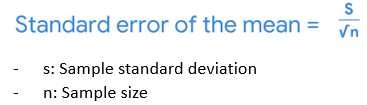

In [15]:
# Calculate margin of error.

# Begin by identifying the z associated with chosen confidence level.
z_value = 1.96

# Next, calculate standard error.
standard_error = aqi_ca['aqi'].std() / np.sqrt(aqi_ca.shape[0])
print("standard error:")
print(standard_error)

# Lastly, use the preceding result to calculate your margin of error.
margin_of_error = standard_error * z_value
print("margin of error:")
print(margin_of_error)

standard error:
0.8987209641127412
margin of error:
1.7614930896609726


### a) Calculate confidence interval using margin of error and sample mean

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [57]:
# Calculate your confidence interval (upper and lower limits).

upper_ci_limit = sample_mean + margin_of_error
lower_ci_limit = sample_mean - margin_of_error
(lower_ci_limit, upper_ci_limit)

(10.359719031551148, 13.882705210873095)

### b) Alternative: Calculate confidence interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [58]:
# Import stats from scipy.
from scipy import stats

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate confidence interval.

In [63]:
# calculate confidence interval
stats.norm.interval(confidence_level, loc=sample_mean, scale=standard_error)

(10.359751399400034, 13.882672843024208)

Note: Both methods give same value for confidence interval. There is a 95% confidence that the population mean AQI for California was between 10.36 and 13.88.

# Considerations

**Key takeaways ?**

* Based on the mean AQI for RRE states, California and Michigan were most likely to have experienced a mean AQI above 10.
* With California experiencing the highest sample mean AQI in the data, it appears to be the state most likely to be affected by the policy change. 
* Constructing a confidence interval allowed to estimate the sample mean AQI with a certain degree of confidence.

**Findings to be shared with stakeholders ?**

* Confidence interval at the 95% level of confidence from this sample data yielded `[10.36 , 13.88]`. This means that there is a 95% confidence that the population mean AQI for California was between 10.36 and 13.88. This range is notably greater than threshold 10."
* If we changed the confidence level to 99%, the confidence interval would become `[9.80 , 14.43]`. 
 